In [1]:
from datetime import datetime
import os
import re
import requests
import time
import urllib

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import wordcloud as wc

from imdb_helper_functions import *
from imdb_code import get_actors_by_movie_soup, get_movies_by_actor_soup, \
get_movie_distance, get_movie_descriptions_by_actor_soup

%matplotlib inline

In [2]:
top_actors = ['Dwayne Johnson',
'Chris Hemsworth',
'Robert Downey Jr.',
'Akshay Kumar',
'Jackie Chan',
'Bradley Cooper',
'Adam Sandler',
'Scarlett Johansson',
'Sofia Vergara',
'Chris Evans']

In [3]:
distance_pairs = pd.DataFrame()
movie_distances_file = 'movie_distances.csv'

if os.path.isfile(movie_distances_file):
    distance_pairs = pd.read_csv(movie_distances_file)

if distance_pairs.empty:
    actors_url_dict = get_actor_url_by_name(top_actors)
    actors_url_list = []
    distance_pairs = {'actor_from': [], 'actor_to': [], 'distance': []}

    for name, url in actors_url_dict.items():
        actors_url_list.append((name, url))

    for i in range(0, 10):
        for j in range(0, 10):
            if i != j:
                distance = get_movie_distance(actors_url_list[i][1], actors_url_list[j][1], 5, 5)
                distance_pairs['actor_from'].append(actors_url_list[i][0])
                distance_pairs['actor_to'].append(actors_url_list[j][0])
                distance_pairs['distance'].append(distance)

    distance_pairs = pd.DataFrame(distance_pairs)
    distance_pairs.to_csv('movie_distances.csv', index=False)

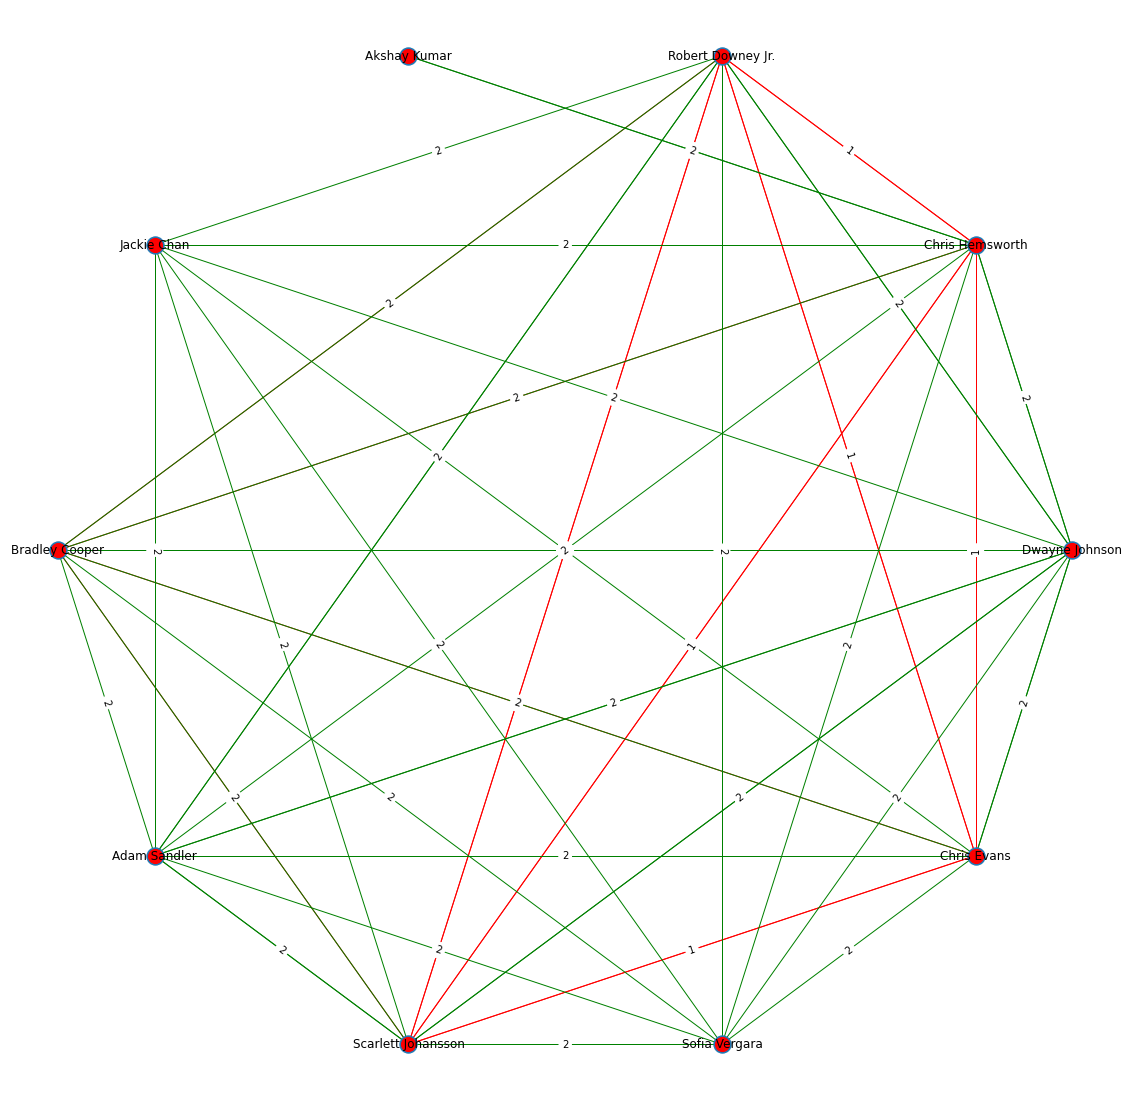

In [4]:
def plot_distances(distance_pairs, show_distance=None):
    G = nx.Graph()

    edge_list = {}

    for index, row in distance_pairs.iterrows():
        if not G.has_node(row['actor_from']):
            G.add_node(row['actor_from'])
        if not G.has_node(row['actor_to']):
            G.add_node(row['actor_to'])

        if row['distance'] != float("inf"):
            edge_list[(row['actor_from'], row['actor_to'])] = int(row['distance'])

    pos=nx.circular_layout(G)

    fig, ax = plt.subplots(figsize=(20,20))

    nx.draw_circular(G, with_labels = True)
    nx.draw_networkx_nodes(G, pos, G.nodes(), node_color='r', node_size=200)

    edgelist1 = {}
    edgelist2 = {}

    for nodes_pair, distance in edge_list.items():
        if distance == 1:
            edgelist1[nodes_pair] = distance
        elif distance == 2:
            edgelist2[nodes_pair] = distance

    if show_distance == 1:
        nx.draw_networkx_edges(G, pos, edgelist=edgelist1, edge_color='r')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edgelist1)
    elif show_distance == 2:
        nx.draw_networkx_edges(G, pos, edgelist=edgelist2, edge_color='g')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edgelist2)
    else:
        nx.draw_networkx_edges(G, pos, edgelist=edgelist1, edge_color='r')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edgelist1)
        nx.draw_networkx_edges(G, pos, edgelist=edgelist2, edge_color='g')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edgelist2)

    plt.show()
    
plot_distances(distance_pairs)

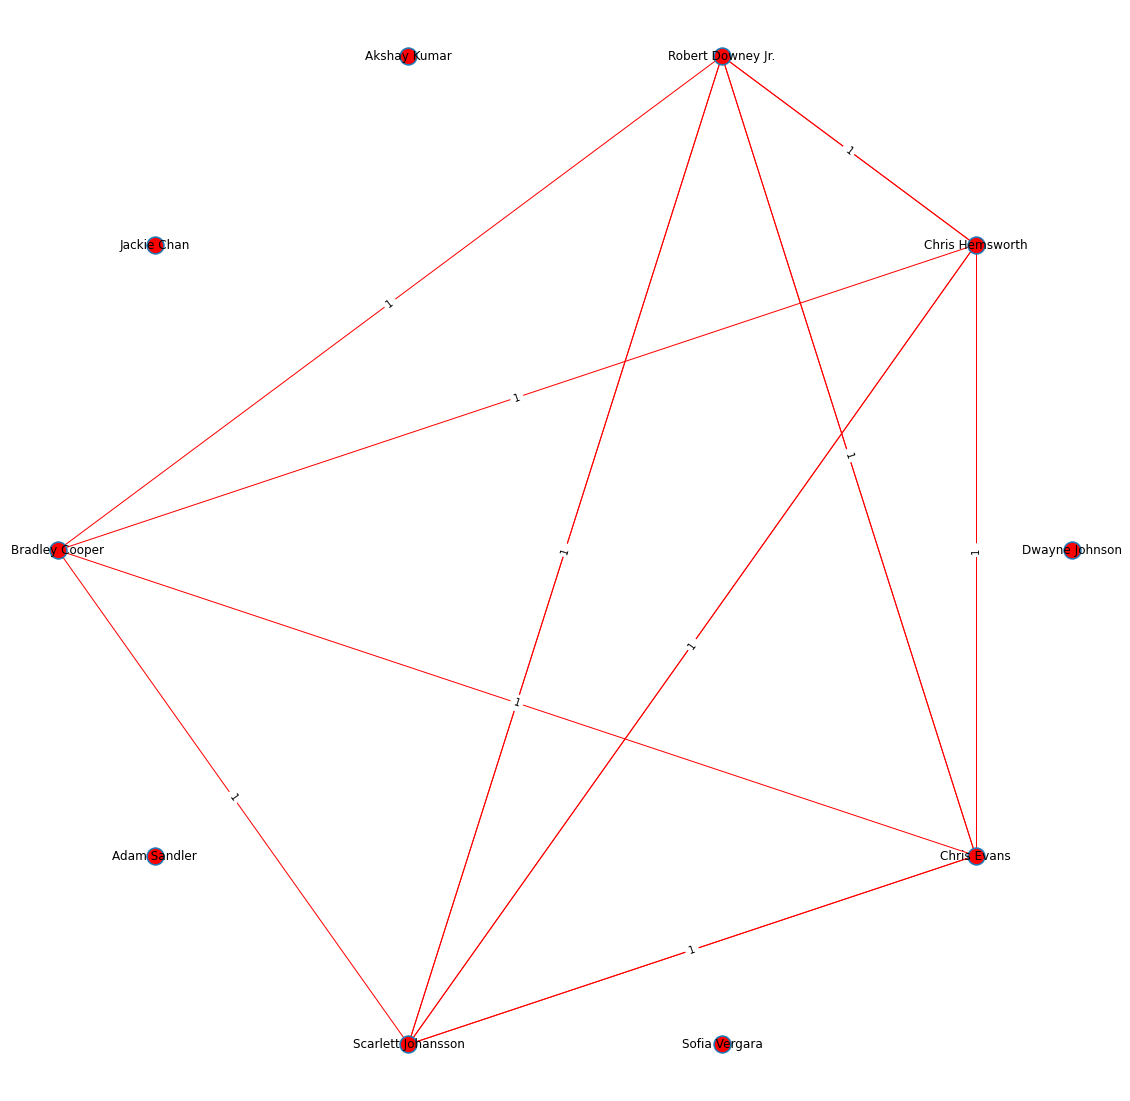

In [5]:
plot_distances(distance_pairs, 1)

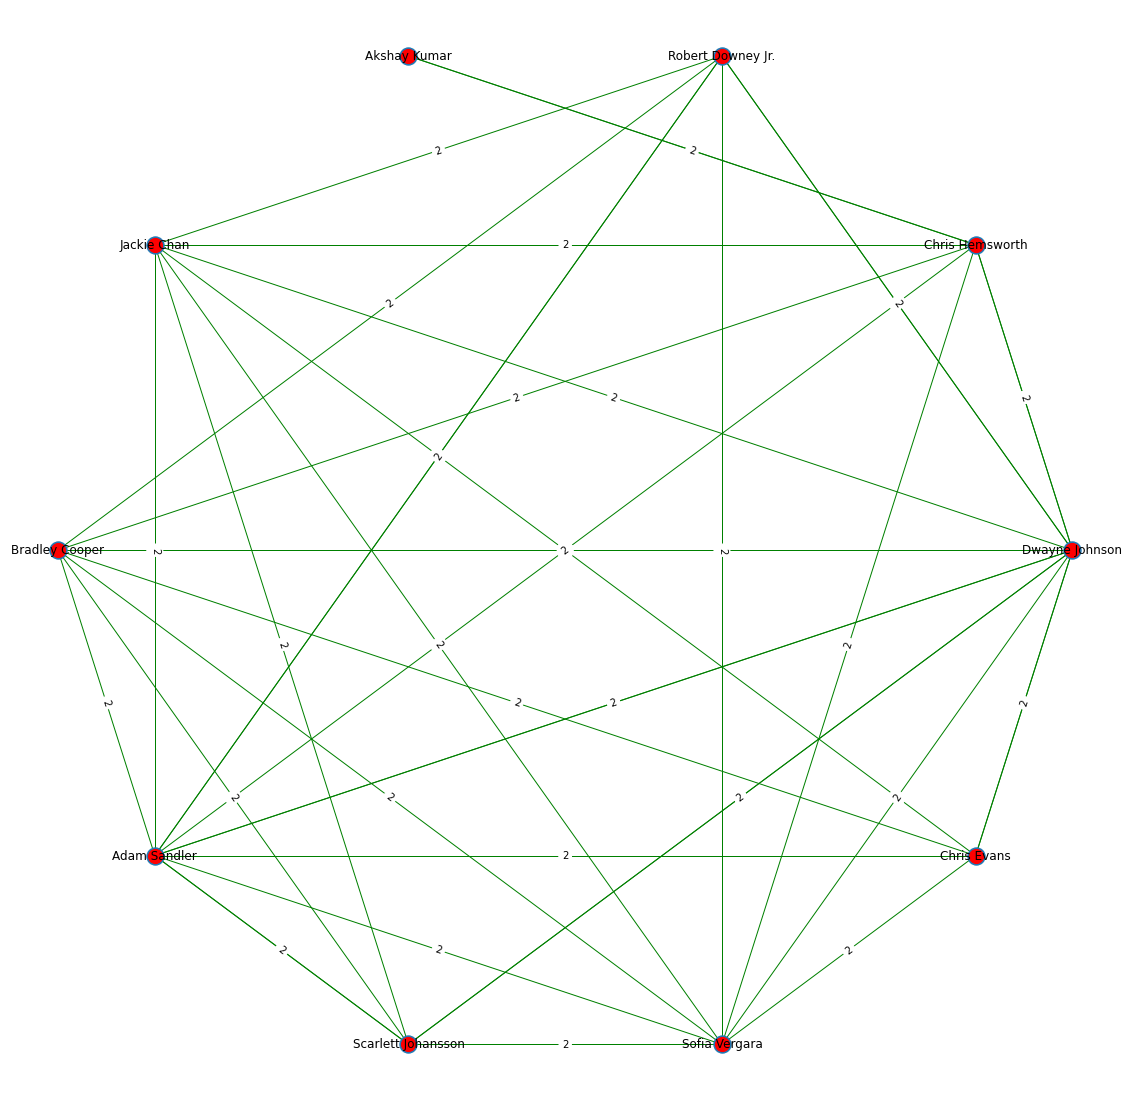

In [6]:
plot_distances(distance_pairs, 2)

In [7]:
all_actor_url_dict = get_actor_url_by_name(top_actors)

actors_desc = {}

for actor_name, actor_url in all_actor_url_dict.items():
    actor_soup = get_actor_movie_soup(actor_url)
    
    actors_desc[actor_name] = get_movie_descriptions_by_actor_soup(actor_soup)

In [8]:
if not os.path.exists('./movie_desc'):
    os.makedirs('./movie_desc')
    
for name, text_list in actors_desc.items():
     with open(os.path.join('movie_desc', name + ".txt"), "w") as text_file:
        text_file.write(" ".join(text_list))

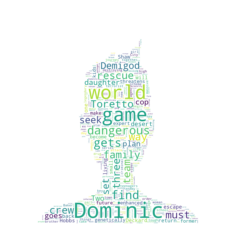

In [9]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["See", "full", "summary"])

man_mask = np.load('./man_mask.npy')
woman_mask = np.load('./woman_mask.npy')

def actor_word_could(text, mask):
    
    wc = WordCloud(background_color="white", max_words=3000, mask=mask, collocations=False,
               stopwords=stopwords, contour_width=0)
    wc.generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Dwayne Johnson
with open('./movie_desc/'+top_actors[0]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)

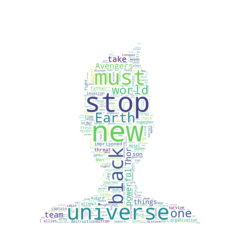

In [10]:
# Chris Hemsworth
with open('./movie_desc/'+top_actors[1]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)

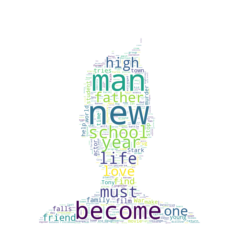

In [11]:
# Robert Downey Jr.
with open('./movie_desc/'+top_actors[2]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)

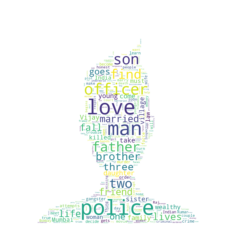

In [12]:
# Akshay Kumar
with open('./movie_desc/'+top_actors[3]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)

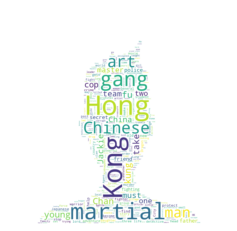

In [13]:
# Jackie Chan
with open('./movie_desc/'+top_actors[4]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)

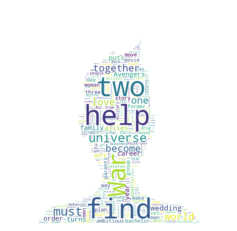

In [14]:
# Bradley Cooper
with open('./movie_desc/'+top_actors[5]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)

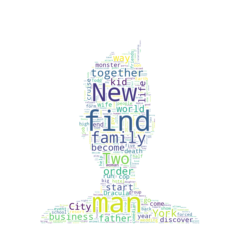

In [15]:
# Adam Sandler
with open('./movie_desc/'+top_actors[6]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)

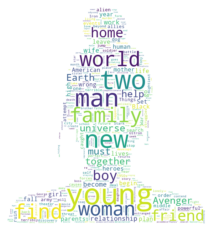

In [16]:
# Scarlett Johansson
with open('./movie_desc/'+top_actors[7]+'.txt', 'r') as text:
    actor_word_could(text.read(), woman_mask)

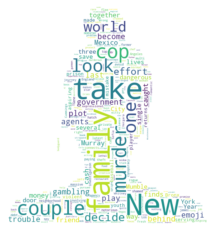

In [17]:
# Sofia Vergara
with open('./movie_desc/'+top_actors[8]+'.txt', 'r') as text:
    actor_word_could(text.read(), woman_mask)

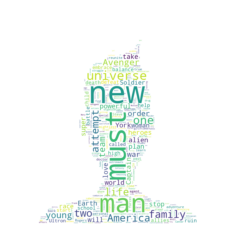

In [18]:
# Chris Evans
with open('./movie_desc/'+top_actors[9]+'.txt', 'r') as text:
    actor_word_could(text.read(), man_mask)